In [38]:
import numpy as np
import torch
from torch.autograd import Variable
from matplotlib import pyplot as plt

### Simple linear regression

* The code is referenced from https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817

In [26]:
# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32).reshape(-1, 1)

x_train

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]], dtype=float32)

In [27]:
y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32).reshape(-1, 1)

y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [28]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        
        return out

In [31]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)

In [32]:
criterion = torch.nn.MSELoss() # Mean Squared Error 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate) # Stochastic Gradient Descent optimization functions 

In [42]:
# start training the model

loss_list = []
for epoch in range(epochs):
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
        
    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()
    
    # get output from the model, given the inputs
    outputs = model(inputs)
    
    # get loss for the predicted output
    loss = criterion(outputs, labels)
#     print(loss)
    
    # get gradients w.r.t to parameters
    loss.backward()
    
    # update parameters
    optimizer.step()
    
    loss_list.append(loss.item())

    print(f'epoch {epoch}, loss {loss.item()}')

epoch 0, loss 1.5158585483732168e-05
epoch 1, loss 1.4992070646258071e-05
epoch 2, loss 1.4822842786088586e-05
epoch 3, loss 1.465865716454573e-05
epoch 4, loss 1.4494232345896307e-05
epoch 5, loss 1.4331462807604112e-05
epoch 6, loss 1.4172112969390582e-05
epoch 7, loss 1.401373083353974e-05
epoch 8, loss 1.3857904377800878e-05
epoch 9, loss 1.37021716000163e-05
epoch 10, loss 1.355004496872425e-05
epoch 11, loss 1.339743994321907e-05
epoch 12, loss 1.324859658780042e-05
epoch 13, loss 1.3101138392812572e-05
epoch 14, loss 1.2954523299413268e-05
epoch 15, loss 1.281037930311868e-05
epoch 16, loss 1.2665682334045414e-05
epoch 17, loss 1.2525738384283613e-05
epoch 18, loss 1.2385286026983522e-05
epoch 19, loss 1.2247329323145095e-05
epoch 20, loss 1.2110225725336932e-05
epoch 21, loss 1.1975641427852679e-05
epoch 22, loss 1.1841425475722644e-05
epoch 23, loss 1.1709103091561701e-05
epoch 24, loss 1.1578547855606303e-05
epoch 25, loss 1.1448294571891893e-05
epoch 26, loss 1.1320685189275

Text(0, 0.5, 'Loss')

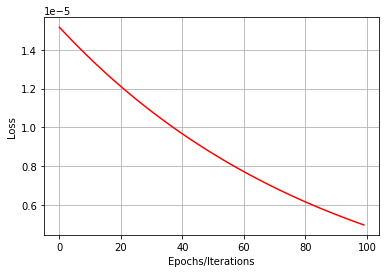

In [48]:
# plot loss function
plt.plot(loss_list, 'r')
plt.grid('True')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")

In [36]:
# test the model
with torch.no_grad(): # we don't need gradients in the testing phase
    predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

[[ 1.0072836]
 [ 3.0062346]
 [ 5.0051856]
 [ 7.004137 ]
 [ 9.003088 ]
 [11.002039 ]
 [13.00099  ]
 [14.999941 ]
 [16.998892 ]
 [18.997845 ]
 [20.996796 ]]


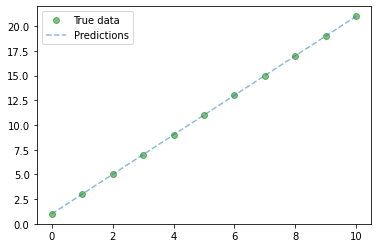

In [39]:
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()